In [5]:
#Importing necessary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import zipfile

zip_path = '/content/titanic.zip'
extract_dir = 'extracted_files'

# Make sure the target directory exists
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Store extracted file paths
extracted_paths = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    for file_name in zip_ref.namelist():
        full_path = os.path.join(extract_dir, file_name)
        extracted_paths.append(os.path.abspath(full_path))

# Print all the extracted file paths
for path in extracted_paths:
    print(path)

/content/extracted_files/gender_submission.csv
/content/extracted_files/test.csv
/content/extracted_files/train.csv


In [6]:
gender_submission = pd.read_csv('/content/extracted_files/gender_submission.csv')
test = pd.read_csv('/content/extracted_files/test.csv')
train = pd.read_csv('/content/extracted_files/train.csv')

In [7]:
#open test data set
print(test.to_string())

     PassengerId  Pclass                                                             Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0            892       3                                                 Kelly, Mr. James    male  34.50      0      0              330911    7.8292              NaN        Q
1            893       3                                 Wilkes, Mrs. James (Ellen Needs)  female  47.00      1      0              363272    7.0000              NaN        S
2            894       2                                        Myles, Mr. Thomas Francis    male  62.00      0      0              240276    9.6875              NaN        Q
3            895       3                                                 Wirz, Mr. Albert    male  27.00      0      0              315154    8.6625              NaN        S
4            896       3                     Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.00      1      1       

In [8]:
print(test.info())
print(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

In [10]:
test.drop(['SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
print(test.to_string()) #show total data in test dataset

     PassengerId  Pclass                                                             Name     Sex    Age
0            892       3                                                 Kelly, Mr. James    male  34.50
1            893       3                                 Wilkes, Mrs. James (Ellen Needs)  female  47.00
2            894       2                                        Myles, Mr. Thomas Francis    male  62.00
3            895       3                                                 Wirz, Mr. Albert    male  27.00
4            896       3                     Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.00
5            897       3                                       Svensson, Mr. Johan Cervin    male  14.00
6            898       3                                             Connolly, Miss. Kate  female  30.00
7            899       2                                     Caldwell, Mr. Albert Francis    male  26.00
8            900       3                        Abrahim

In [11]:
print(test.head()) # show data in first 5 rows in test data set
print(test.tail()) # show data in last 5 rows in test data set

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  
0  34.5  
1  47.0  
2  62.0  
3  27.0  
4  22.0  
     PassengerId  Pclass                          Name     Sex   Age
413         1305       3            Spector, Mr. Woolf    male   NaN
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5
416         1308       3           Ware, Mr. Frederick    male   NaN
417         1309       3      Peter, Master. Michael J    male   NaN


In [12]:
test.fillna({'Age':test['Age'].mean()},inplace=True)
print("It's our Cleaned Dataset:=\n",test.to_string())

It's our Cleaned Dataset:=
      PassengerId  Pclass                                                             Name     Sex       Age
0            892       3                                                 Kelly, Mr. James    male  34.50000
1            893       3                                 Wilkes, Mrs. James (Ellen Needs)  female  47.00000
2            894       2                                        Myles, Mr. Thomas Francis    male  62.00000
3            895       3                                                 Wirz, Mr. Albert    male  27.00000
4            896       3                     Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.00000
5            897       3                                       Svensson, Mr. Johan Cervin    male  14.00000
6            898       3                                             Connolly, Miss. Kate  female  30.00000
7            899       2                                     Caldwell, Mr. Albert Francis    male  26.00000


In [13]:
#check here is any null value present or not
print(test.isnull())

     PassengerId  Pclass   Name    Sex    Age
0          False   False  False  False  False
1          False   False  False  False  False
2          False   False  False  False  False
3          False   False  False  False  False
4          False   False  False  False  False
..           ...     ...    ...    ...    ...
413        False   False  False  False  False
414        False   False  False  False  False
415        False   False  False  False  False
416        False   False  False  False  False
417        False   False  False  False  False

[418 rows x 5 columns]


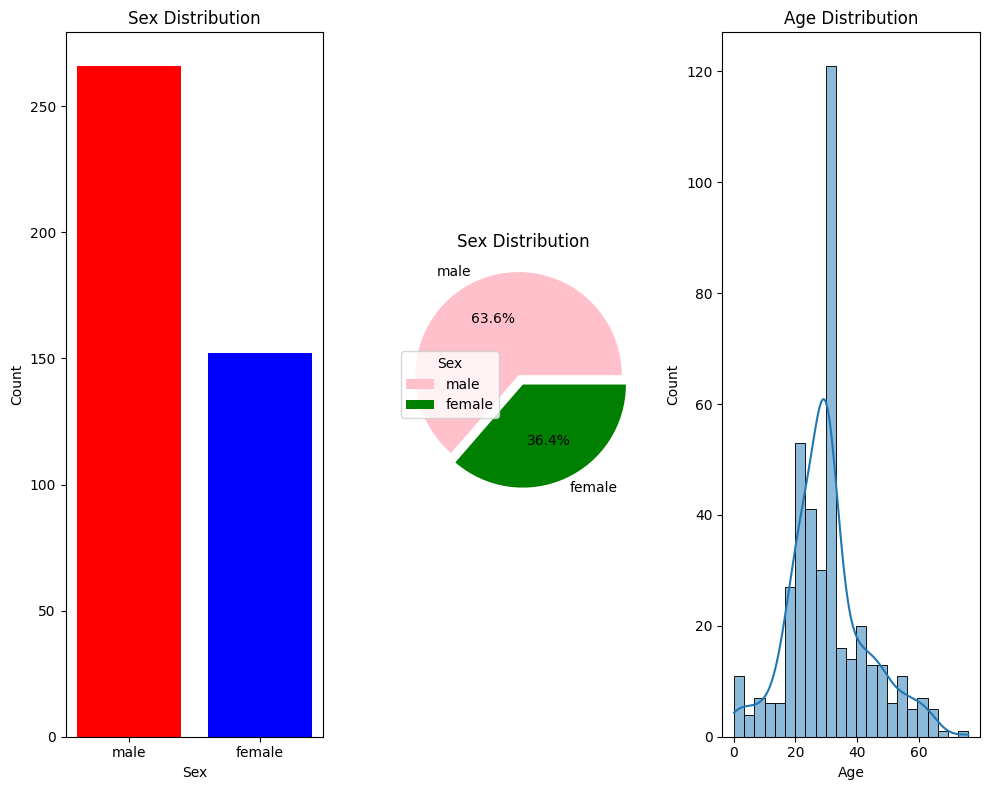

In [14]:
# visualization of the data
plt.figure(figsize=(10,8))
my_explode=[0.1,0]
# Bar plot for Sex distribution
plt.subplot(1,3,1)
sex_counts = test['Sex'].value_counts()
my_colors = ['red', 'blue']
plt.bar(sex_counts.index, sex_counts.values, color=my_colors)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution")

# Pie chart for Sex distribution
plt.subplot(1,3,2)
my_colors = ['pink', 'green']
plt.pie(sex_counts, labels=sex_counts.index,explode=my_explode,colors=my_colors,autopct='%1.1f%%')
plt.title("Sex Distribution")
plt.legend(title='Sex')

# Histogram for Age distribution
plt.subplot(1,3,3)
sns.histplot(test['Age'],kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

plt.tight_layout()
plt.show()

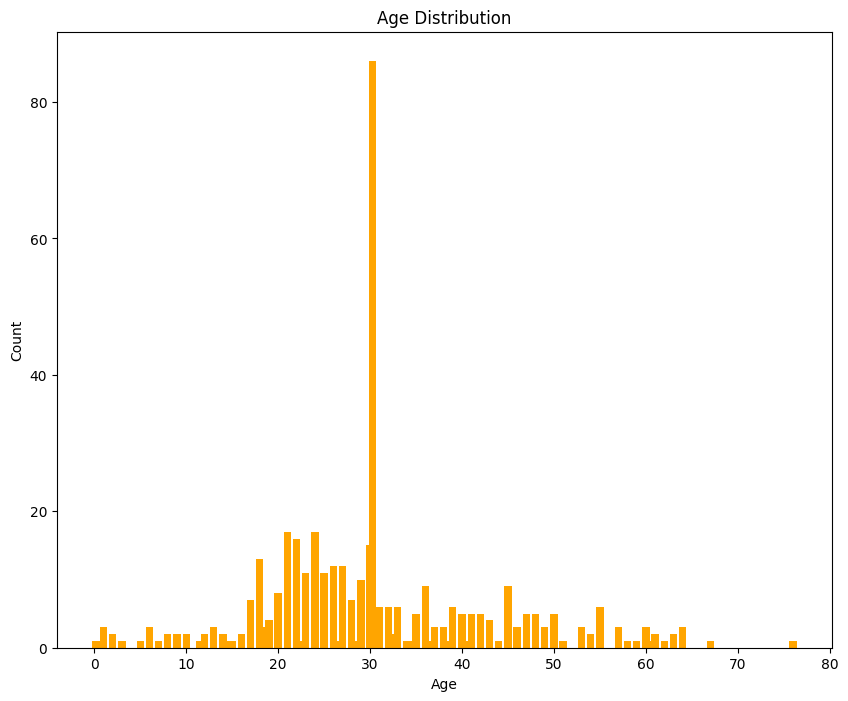

In [15]:
# Count the frequency of each age
age_counts = test['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.bar(age_counts.index, age_counts.values, color='orange')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

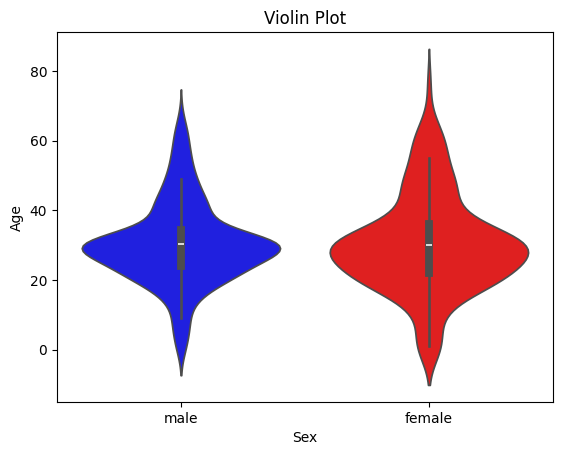

In [16]:
# Violin Plot
my_colors = ['blue', 'red']
sns.violinplot(data=test, x="Sex", y="Age", hue="Sex",palette=my_colors, legend=False)
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Violin Plot")
plt.show()

In [17]:
#Same way use train data used to clean and train the model then after use test data to check accuracy if accuracy less than 75 percent improve your accuracy
print(train.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

In [18]:
train.drop(['SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
print(train.to_string()) #show total data in train dataset

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00
4              5         0       3                                                            Allen, Mr. William Henry    male  35.00
5              6         0       3                                                                    Moran, Mr. James    male    NaN
6              7         0       1                            

In [37]:
print(train.head()) # show data in first 5 rows in train data set
print(train.tail()) # show data in last 5 rows in train data set
train.fillna({'Age':train['Age'].mean()},inplace=True)  # remove null value with mean age value
print("It's our Cleaned Dataset:=\n",train.to_string()) # show in one line column whole dataset
print(train.isnull())  # if any null value present it's show True and no null value present show False
print(train.info())    # information of train data set
print(train.describe())  # description of dataset such as mean, std, count, and Quartile

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  
0                            Braund, Mr. Owen Harris    male  22.0  
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0  
2                             Heikkinen, Miss. Laina  female  26.0  
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  
4                           Allen, Mr. William Henry    male  35.0  
     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1               

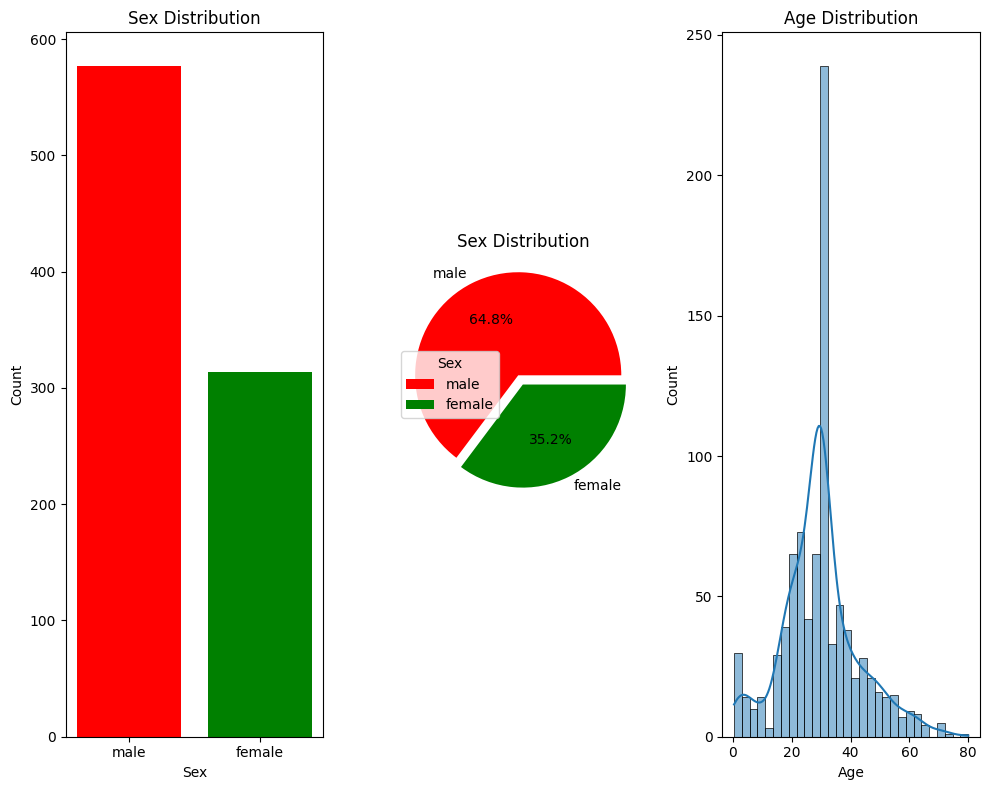

In [38]:
# visualization of the data
plt.figure(figsize=(10,8))
my_explode=[0.1,0]
# Bar plot for Sex distribution
plt.subplot(1,3,1)
sex_counts = train['Sex'].value_counts()
my_colors = ['red', 'green']
plt.bar(sex_counts.index, sex_counts.values, color=my_colors)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution")

# Pie chart for Sex distribution
plt.subplot(1,3,2)
my_colors = ['red', 'green']
plt.pie(sex_counts, labels=sex_counts.index,explode=my_explode,colors=my_colors,autopct='%1.1f%%')
plt.title("Sex Distribution")
plt.legend(title='Sex')

# Histogram for Age distribution
plt.subplot(1,3,3)
sns.histplot(train['Age'],kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

plt.tight_layout()
plt.show()

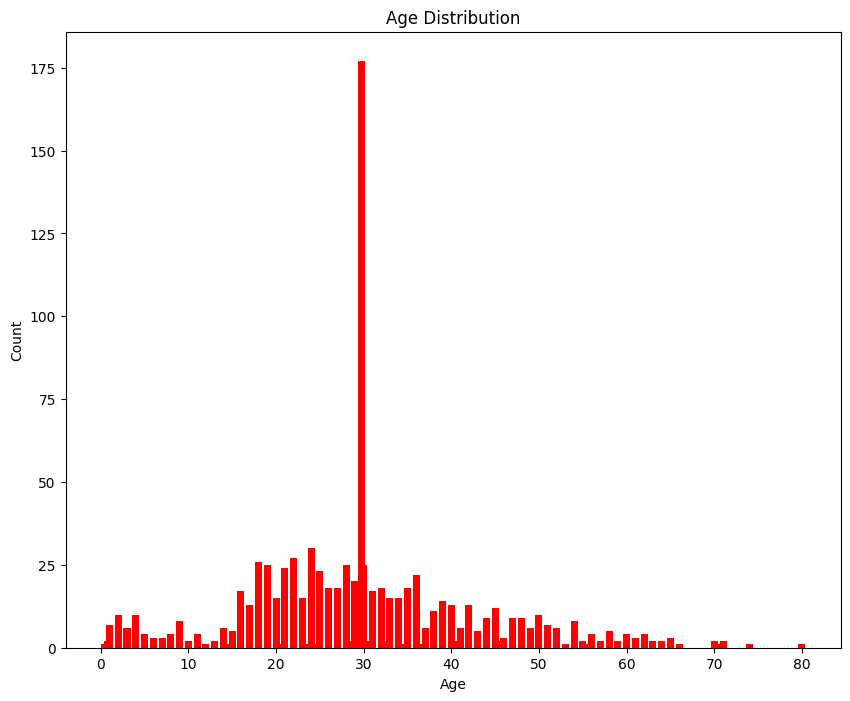

In [39]:
# Count the frequency of each age
age_counts = train['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.bar(age_counts.index, age_counts.values, color='red')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

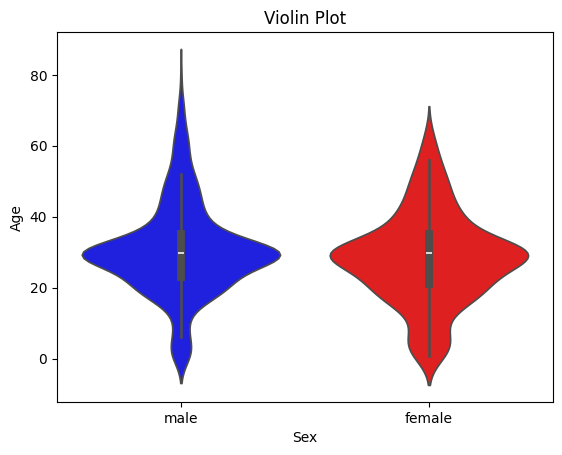

In [40]:
# Violin Plot
my_colors = ['blue', 'red']
sns.violinplot(data=train, x="Sex", y="Age", hue="Sex",palette=my_colors, legend=False)
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Violin Plot")
plt.show()

Survived    0    1
Sex               
female     81  233
male      468  109
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


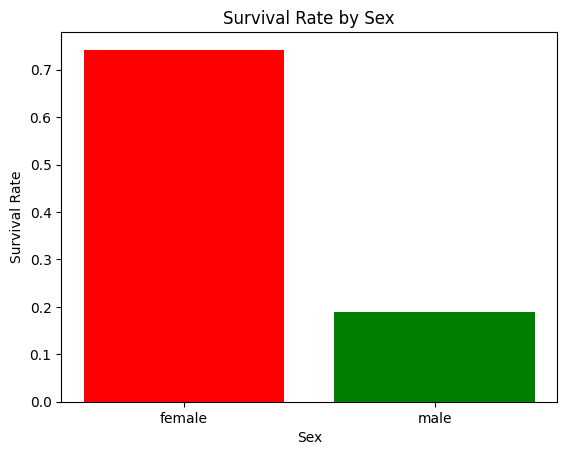

In [50]:
# Count of survivors by sex
survival_by_sex = pd.crosstab(train['Sex'], train['Survived'])
print(survival_by_sex)

# Survival rate by sex
survival_rate_by_sex = train.groupby('Sex')['Survived'].mean()
print(survival_rate_by_sex)

# Optional: Visualization
my_colors = ['red', 'green']
plt.bar(x=survival_rate_by_sex.index, height=survival_rate_by_sex.values, color=my_colors)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

**Model Traing and model splitting.**

In [20]:
# using a model selection for binary search on survival data
from sklearn.model_selection import train_test_split # spillting data into testing and traing data in model
from sklearn.linear_model import LogisticRegression  # for binary model
from sklearn.metrics import accuracy_score           # check testing data with model

In [21]:
# Select features and target variable
x = train[['PassengerId','Pclass','Age']]
y = train['Survived']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(x_test)
Accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {Accuracy}")

Accuracy: 0.7399103139013453


In [22]:
#Check the data with testing data sets
x_testing=test[['PassengerId','Pclass','Age']]
prediction=model.predict(x_testing)
prediction_df = pd.DataFrame(prediction, columns=['Survived'])
print(prediction_df)

     Survived
0           0
1           0
2           0
3           0
4           0
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


In [24]:
# check accuracy with gender_submission
Accuracy_check_gender_submission = accuracy_score(gender_submission['Survived'], prediction_df)
print(f"Accuracy: {Accuracy_check_gender_submission}")

Accuracy: 0.6148325358851675


In [25]:
prediction_df = pd.DataFrame(prediction, columns=['Survived'])
merged_df = pd.merge(test, prediction_df, left_index=True, right_index=True)
print(merged_df.to_string())

     PassengerId  Pclass                                                             Name     Sex       Age  Survived
0            892       3                                                 Kelly, Mr. James    male  34.50000         0
1            893       3                                 Wilkes, Mrs. James (Ellen Needs)  female  47.00000         0
2            894       2                                        Myles, Mr. Thomas Francis    male  62.00000         0
3            895       3                                                 Wirz, Mr. Albert    male  27.00000         0
4            896       3                     Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.00000         0
5            897       3                                       Svensson, Mr. Johan Cervin    male  14.00000         0
6            898       3                                             Connolly, Miss. Kate  female  30.00000         0
7            899       2                                

In [26]:
import pandas as pd
final_df = pd.concat([train, merged_df], ignore_index=True)
print(final_df.to_string())

      PassengerId  Survived  Pclass                                                                                Name     Sex        Age
0               1         0       3                                                             Braund, Mr. Owen Harris    male  22.000000
1               2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.000000
2               3         1       3                                                              Heikkinen, Miss. Laina  female  26.000000
3               4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000
4               5         0       3                                                            Allen, Mr. William Henry    male  35.000000
5               6         0       3                                                                    Moran, Mr. James    male  29.699118
6               7         0